In [190]:
import pandas as pd
df=pd.read_csv("bank_marketing_dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [191]:
# df=df[["age","job","balance","loan","contact"]]
# df.head()

In [192]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["loan"]=encoder.fit_transform(df["loan"])
df["contact"]=encoder.fit_transform(df["contact"])
df["job"]=encoder.fit_transform(df["job"])
df["deposit"]=encoder.fit_transform(df["deposit"])

In [193]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,married,secondary,no,2343,yes,0,2,5,may,1042,1,-1,0,unknown,1
1,56,0,married,secondary,no,45,no,0,2,5,may,1467,1,-1,0,unknown,1
2,41,9,married,secondary,no,1270,yes,0,2,5,may,1389,1,-1,0,unknown,1
3,55,7,married,secondary,no,2476,yes,0,2,5,may,579,1,-1,0,unknown,1
4,54,0,married,tertiary,no,184,no,0,2,5,may,673,2,-1,0,unknown,1


In [194]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [195]:
x=df[["age","job","balance","loan","contact"]]
y=df["deposit"]

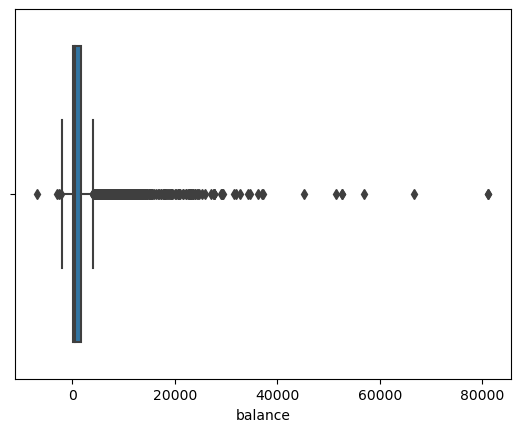

In [196]:
import seaborn as sns
sns.boxplot(x=df["balance"])

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [198]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [199]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [200]:
y_pred=classifier.predict(x_test)
print(y_pred)

[1 0 1 ... 1 1 0]


In [201]:
from sklearn.metrics import *
acc=accuracy_score(y_test,y_pred)
print(acc)

0.658307210031348


In [202]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
 
# import seaborn as sns
# sns.heatmap(cm,annot=True)

[[717 449]
 [314 753]]


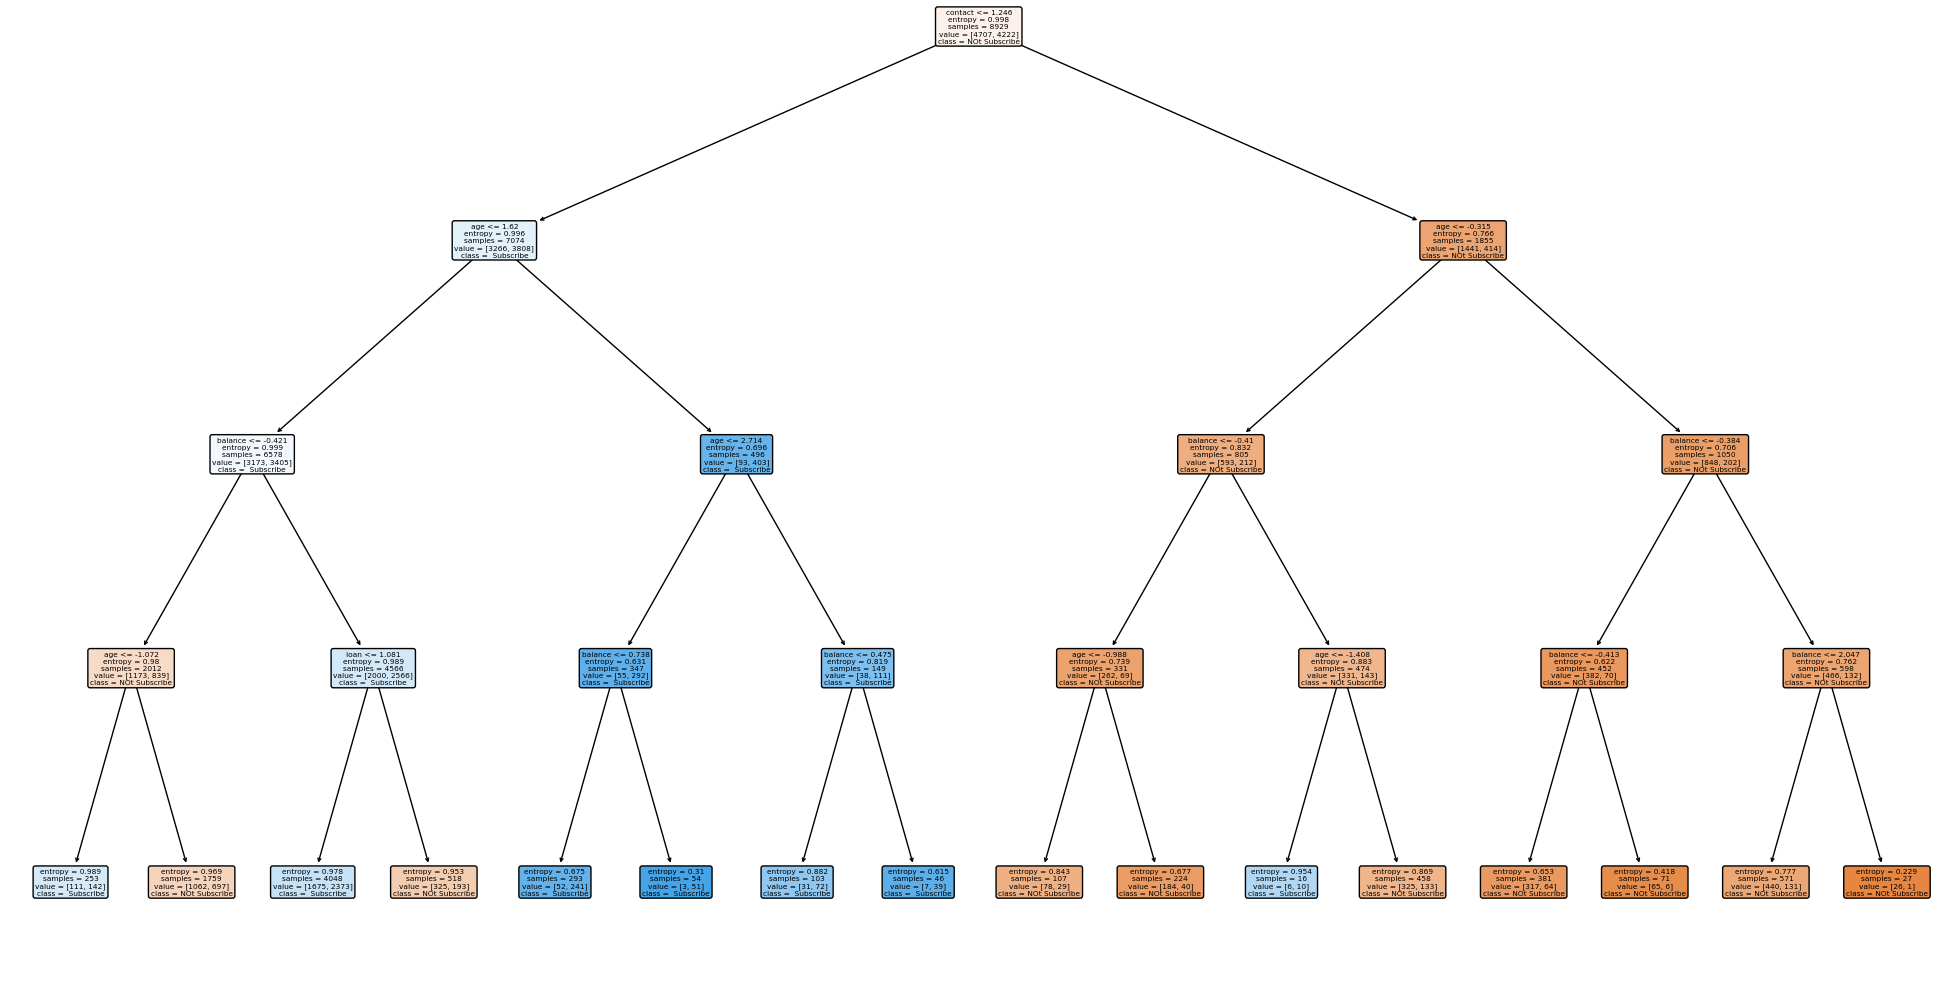

In [203]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(classifier,
          feature_names=x.columns,
          class_names=["NOt Subscribe"," Subscribe"],
          filled=True,
          rounded=True
          )
plt.show()

In [204]:
from sklearn.tree import export_text

rules = export_text(classifier, feature_names=list(x.columns))
print(rules)


|--- contact <= 1.25
|   |--- age <= 1.62
|   |   |--- balance <= -0.42
|   |   |   |--- age <= -1.07
|   |   |   |   |--- class: 1
|   |   |   |--- age >  -1.07
|   |   |   |   |--- class: 0
|   |   |--- balance >  -0.42
|   |   |   |--- loan <= 1.08
|   |   |   |   |--- class: 1
|   |   |   |--- loan >  1.08
|   |   |   |   |--- class: 0
|   |--- age >  1.62
|   |   |--- age <= 2.71
|   |   |   |--- balance <= 0.74
|   |   |   |   |--- class: 1
|   |   |   |--- balance >  0.74
|   |   |   |   |--- class: 1
|   |   |--- age >  2.71
|   |   |   |--- balance <= 0.47
|   |   |   |   |--- class: 1
|   |   |   |--- balance >  0.47
|   |   |   |   |--- class: 1
|--- contact >  1.25
|   |--- age <= -0.31
|   |   |--- balance <= -0.41
|   |   |   |--- age <= -0.99
|   |   |   |   |--- class: 0
|   |   |   |--- age >  -0.99
|   |   |   |   |--- class: 0
|   |   |--- balance >  -0.41
|   |   |   |--- age <= -1.41
|   |   |   |   |--- class: 1
|   |   |   |--- age >  -1.41
|   |   |   |   |--- c

In [205]:
root_feature_index = classifier.tree_.feature[0]
root_feature = x.columns[root_feature_index]

print("Top (Root) Feature:", root_feature)


Top (Root) Feature: contact


In [206]:
import pandas as pd

importance = pd.DataFrame({
    "Feature": x.columns,
    "Importance": classifier.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)


   Feature  Importance
4  contact    0.567468
0      age    0.211661
2  balance    0.143052
3     loan    0.077819
1      job    0.000000


In [207]:
depths = [2, 4, 6, 10]
for d in depths:
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Depth {d} Accuracy:", accuracy_score(y_test, y_pred))


Depth 2 Accuracy: 0.593819973130318
Depth 4 Accuracy: 0.658307210031348
Depth 6 Accuracy: 0.6569637259292431
Depth 10 Accuracy: 0.6556202418271384


In [208]:
for d in [2, 4, 6, None]:
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    print(f"Depth={d} | Train Acc={train_acc:.3f} | Test Acc={test_acc:.3f}")


Depth=2 | Train Acc=0.588 | Test Acc=0.594
Depth=4 | Train Acc=0.644 | Test Acc=0.658
Depth=6 | Train Acc=0.649 | Test Acc=0.657
Depth=None | Train Acc=0.982 | Test Acc=0.598


In [209]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision, Recall, F1-score:")
print(classification_report(y_test, y_pred))



print("Number of nodes in tree:", classifier.tree_.node_count)
print("Tree depth:", classifier.tree_.max_depth)


Accuracy: 0.6556202418271384
Precision, Recall, F1-score:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1166
           1       0.63      0.66      0.65      1067

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233

Number of nodes in tree: 31
Tree depth: 4
